# Feature transformation or analysis

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd

#from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



In [49]:
# Load dataset
data = pd.read_csv('/content/fruits_data_ext.csv')  # Replace 'your_dataset.csv' with the path to your dataset file
print(data.columns)
data.head()

X = data.iloc[:,4:] # Replace 'target_column_name' with the name of your target column
y = data['fruit_label']

## Add some noisy data to degrade features
#random_features = np.random.RandomState(1000).uniform(0, 0.5, size=(X.shape[0] , 20))
#X = np.hstack((X, random_features))
#print (X.shape, y.shape)

# Normalize data to 0-1
X = MinMaxScaler().fit_transform(X)

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Index(['Unnamed: 0', 'fruit_label', 'fruit_name', 'fruit_subtype', 'mass',
       'width', 'height', 'color_score'],
      dtype='object')
(132, 4) (45, 4) (132,) (45,)


Accuracy: 0.9111111111111111


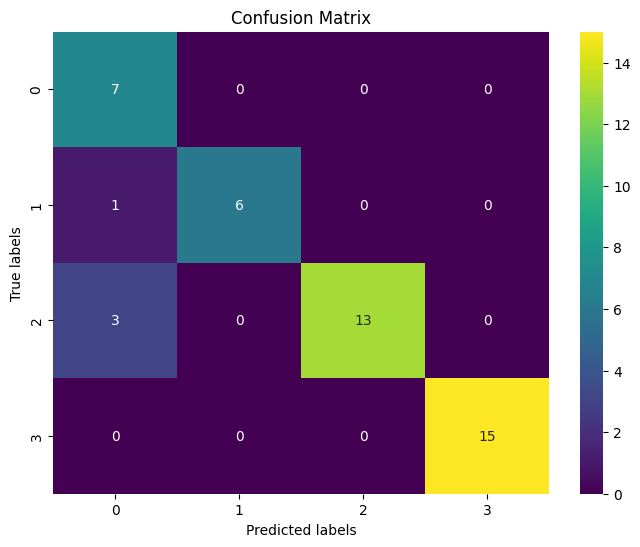

In [50]:

# Create and train classifier
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)

# Estimate predictions
predictions = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Estimate predictions and compute some metrics

predictions = _

# Print results


### Principal Component Analysis (PCA) -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)


In [51]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components = 2, random_state = 1 ) #

# Create reduced versions of subset
trans_train = pca.fit_transform(X_train, y_train)
trans_test = pca.transform(X_test)

print(trans_train.shape, trans_train.shape)
print(pca.explained_variance_)

(132, 2) (132, 2)
[0.08574135 0.03498187]


(132, 2) (45, 2)


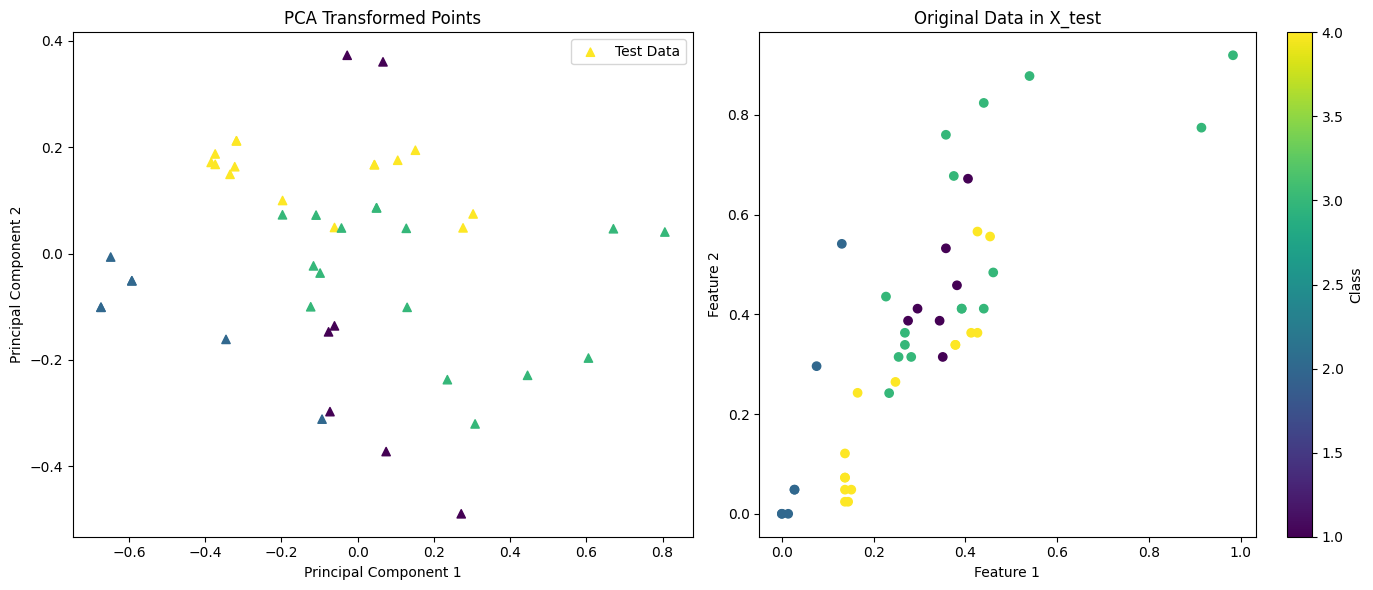

In [53]:
# Aplicar PCA
pca = PCA(n_components=2, random_state=1)
trans_train = pca.fit_transform(X_train)
trans_test = pca.transform(X_test)

# Imprimir las formas de los datos transformados
print(trans_train.shape, trans_test.shape)

# Graficar los puntos transformados y los datos originales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de los puntos transformados
#scatter_train = ax1.scatter(trans_train[:, 0], trans_train[:, 1], c=y_train, cmap='viridis', label='Train Data')
scatter_test = ax1.scatter(trans_test[:, 0], trans_test[:, 1], c=y_test, cmap='viridis', marker='^', label='Test Data')
ax1.set_title('PCA Transformed Points')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend()

# Gráfico de los datos originales en X_test
scatter_orig = ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
ax2.set_title('Original Data in X_test')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.colorbar(scatter_orig, ax=ax2, label='Class', cmap = 'viridis')
plt.tight_layout()
plt.show()


In [54]:
# Classify PCA features and compute predictions
clf = SVC(kernel = 'poly')
clf.fit(trans_train, y_train)

predictions2 = clf.predict(trans_test)

# Clasification boundaries
x_min, x_max = trans_test[:, 0].min() - 1, trans_test[:, 0].max() + 1
y_min, y_max = trans_test[:, 1].min() - 1, trans_test[:, 1].max() + 1

x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = pred_grid.reshape(x_grid.shape)



For PCA
Accuracy before: 0.911, - Now: 0.511



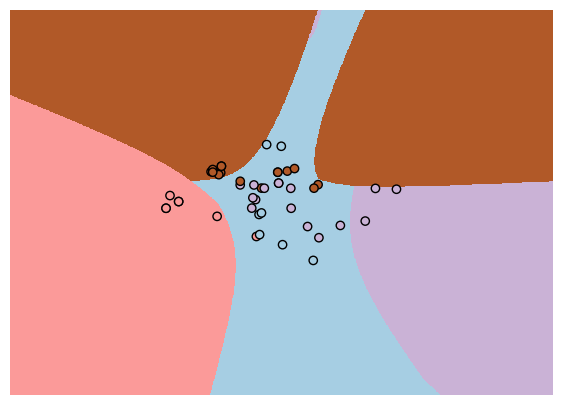

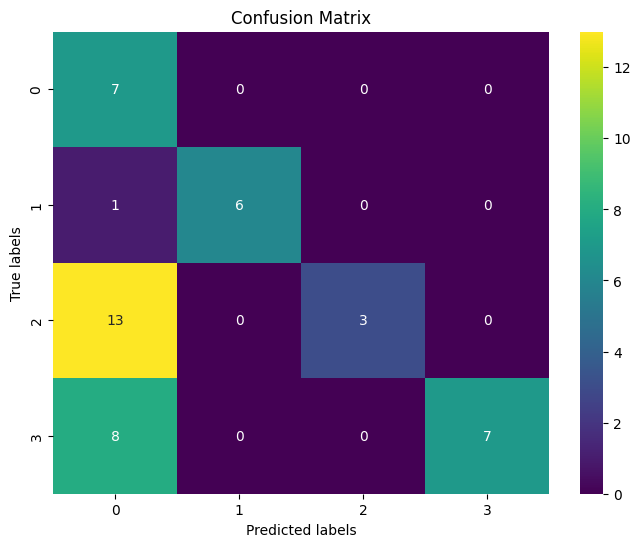

In [55]:
# plot everything
_, ax = plt.subplots(figsize=(7, 5))

ax.pcolormesh(x_grid, y_grid, pred_grid, cmap=plt.cm.Paired)

# scatter plot of transformed points
scatter = ax.scatter(trans_test[:, 0], trans_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
ax.set_axis_off()

# Compute metrics
accuracy_before = accuracy_score(y_test, predictions2)
# Compute accuracy
accuracy = accuracy_score(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now: {1:.3f}\n".format(accuracy, accuracy_before))

cm = confusion_matrix(y_test, predictions2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Comput metrics

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( _ , _ ))


### Kernel PCA -> [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
kpca = KernelPCA(n_components = _ )

# Create reduced versions of subset
trasn_train = _
trans_test

For PCA
Accuracy before: 0.911, - Now: 0.511

For KernelPCA
Accuracy before: 0.911, - Now: 0.511



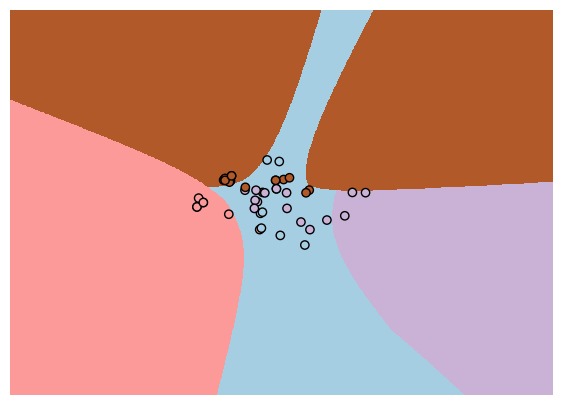

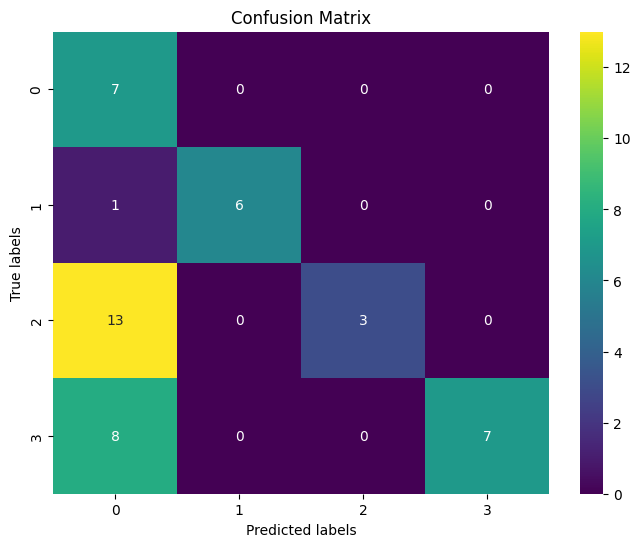

In [56]:
from sklearn.decomposition import KernelPCA

# Apply KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', random_state=1)
trans_train = kpca.fit_transform(X_train, y_train)
trans_test = kpca.transform(X_test)

# Classify KernelPCA features and compute predictions
clf = SVC(kernel='poly')
clf.fit(trans_train, y_train)
predictions3 = clf.predict(trans_test)

# Clasification boundaries
x_min, x_max = trans_test[:, 0].min() - 1, trans_test[:, 0].max() + 1
y_min, y_max = trans_test[:, 1].min() - 1, trans_test[:, 1].max() + 1

x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = pred_grid.reshape(x_grid.shape)

# Plot everything
_, ax = plt.subplots(figsize=(7, 5))

ax.pcolormesh(x_grid, y_grid, pred_grid, cmap=plt.cm.Paired)

# Scatter plot of transformed points
scatter = ax.scatter(trans_test[:, 0], trans_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
ax.set_axis_off()

# Compute metrics
accuracy_before2 = accuracy_score(y_test, predictions3)
# Compute accuracy
accuracy = accuracy_score(y_test, predictions)

# Compare against original model
print("For PCA")
print("Accuracy before: {0:.3f}, - Now: {1:.3f}\n".format(accuracy, accuracy_before))

# Compare against original model
print("For KernelPCA")
print("Accuracy before: {0:.3f}, - Now: {1:.3f}\n".format(accuracy, accuracy_before2))

cm = confusion_matrix(y_test, predictions3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Plot transformed points


In [ ]:
# Classify kernel PCA features and compute predictions
clf = _


In [ ]:
# Clasification boundaries
x_min, x_max = _ , _
y_min, y_max = _ , _

x_grid, y_grid = np.meshgrid(np.linspace( _ , _ , 1000), np.linspace( _ , _ , 1000))
pred_grid = clf.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
pred_grid = _

In [ ]:
# plot everything
_, ax = plt.subplots(figsize = (7,5))

ax.pcolormesh( _ , _ , _ , cmap = plt.cm.Paired) #, cmap = plt.cm.Paired

ax.scatter ( _ , _ , _ , edgecolor = 'k', cmap = plt.cm.Paired) # edgecolors = 'k',
ax.set_axis_off()

In [ ]:
# Comput metrics

# Compare against original model
print("For Kernel PCA")
print("Accuracy before: {0:.3f}, - Now : {1:.3f} \n".format( _ , _ ))
